# Unsupervised learning (nenadgledano učenje)

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
from IPython.display import display_html
def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html(index=False)
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

In [3]:
df = pd.read_csv("digital_literacy_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [4]:
df.drop_duplicates(keep='first',inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       788 non-null    object 
 1   Age                                           788 non-null    int64  
 2   Gender                                        788 non-null    object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             788 non-null    object 
 5   Household_Income                              788 non-null    object 
 6   Location_Type                                 788 non-null    object 
 7   Basic_Computer_Knowledge_Score                788 non-null    int64  
 8   Internet_Usage_Score                          788 non-null    int64  
 9   Mobile_Literacy_Score                         788 non-null    int64  


In [5]:
df.drop(columns=['User_ID','Overall_Literacy_Score'], inplace=True)

In [6]:
label_mappings = {}
label_encoders = {}
encoding_dfs={}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_dfs[col] = pd.DataFrame(
        list(label_mappings[col].items()),
        columns=[f"{col}_original", f"{col}_encoded"]
    )


In [7]:
showReports(encoding_dfs.values(), encoding_dfs.keys())

Gender 
 
 
 Gender_original 
 Gender_encoded 
 
 
 
 
 Female 
 0 
 
 
 Male 
 1 
 
 
 Other 
 2 
 
 
 Education_Level 
 
 
 Education_Level_original 
 Education_Level_encoded 
 
 
 
 
 High School 
 0 
 
 
 Primary 
 1 
 
 
 Secondary 
 2 
 
 
 Employment_Status 
 
 
 Employment_Status_original 
 Employment_Status_encoded 
 
 
 
 
 Farmer 
 0 
 
 
 Other 
 1 
 
 
 Self-Employed 
 2 
 
 
 Student 
 3 
 
 
 Unemployed 
 4 
 
 
 Household_Income 
 
 
 Household_Income_original 
 Household_Income_encoded 
 
 
 
 
 High 
 0 
 
 
 Low 
 1 
 
 
 Medium 
 2 
 
 
 Location_Type 
 
 
 Location_Type_original 
 Location_Type_encoded 
 
 
 
 
 Rural 
 0 
 
 
 Semi-Rural 
 1 
 
 
 Engagement_Level 
 
 
 Engagement_Level_original 
 Engagement_Level_encoded 
 
 
 
 
 High 
 0 
 
 
 Low 
 1 
 
 
 Medium 
 2 
 
 
 Employment_Impact 
 
 
 Employment_Impact_original 
 Employment_Impact_encoded 
 
 
 
 
 No 
 0 
 
 
 Yes 
 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           788 non-null    int64  
 1   Gender                                        788 non-null    int32  
 2   Education_Level                               788 non-null    int32  
 3   Employment_Status                             788 non-null    int32  
 4   Household_Income                              788 non-null    int32  
 5   Location_Type                                 788 non-null    int32  
 6   Basic_Computer_Knowledge_Score                788 non-null    int64  
 7   Internet_Usage_Score                          788 non-null    int64  
 8   Mobile_Literacy_Score                         788 non-null    int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  788 non-null    int64  


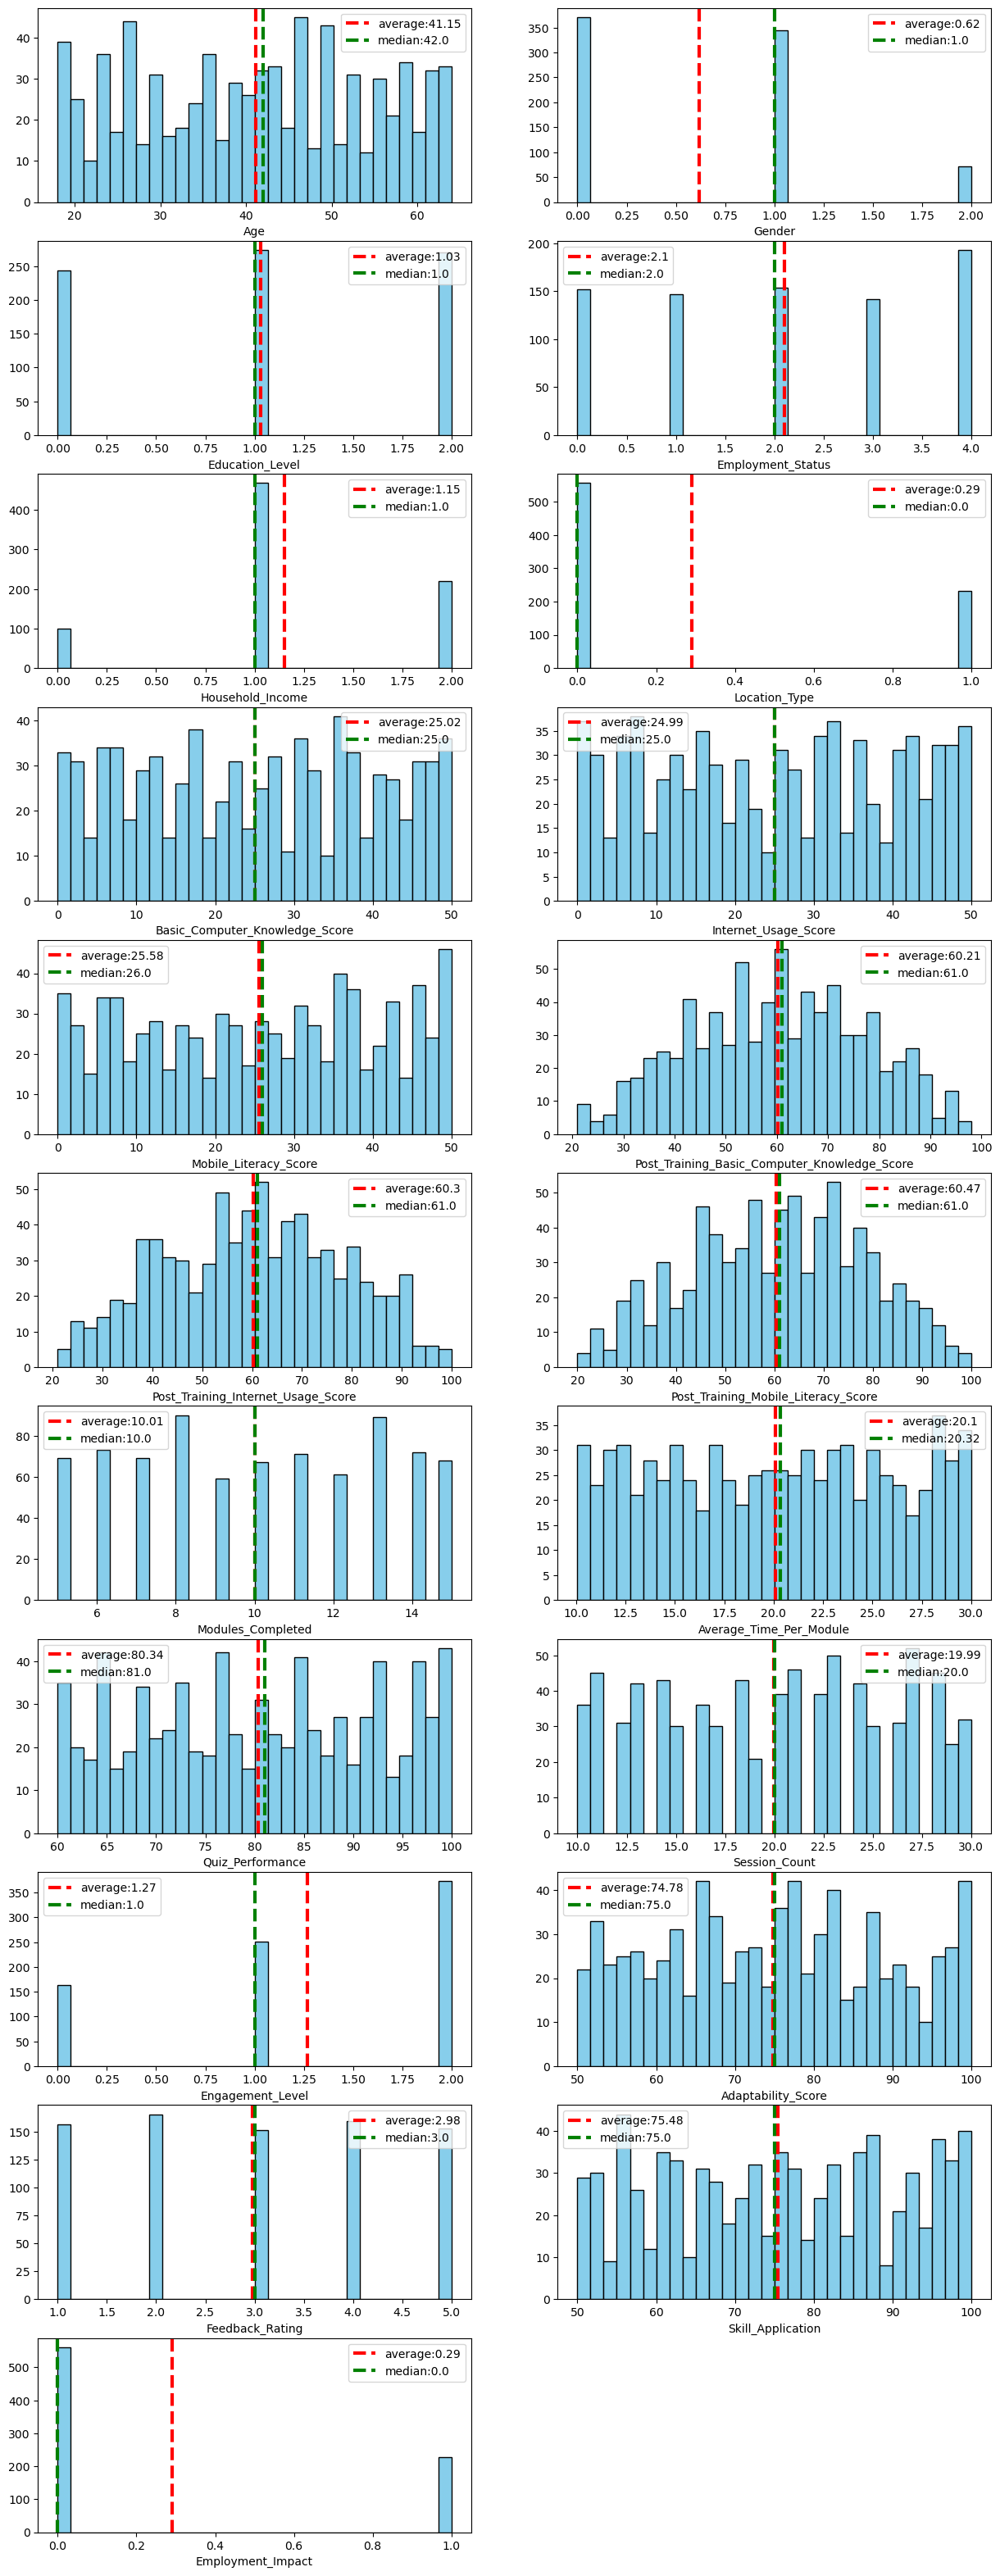

In [9]:
plt.figure(figsize=(15,40))
for ind,col in enumerate(df.columns):
    plt.subplot(11,2,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

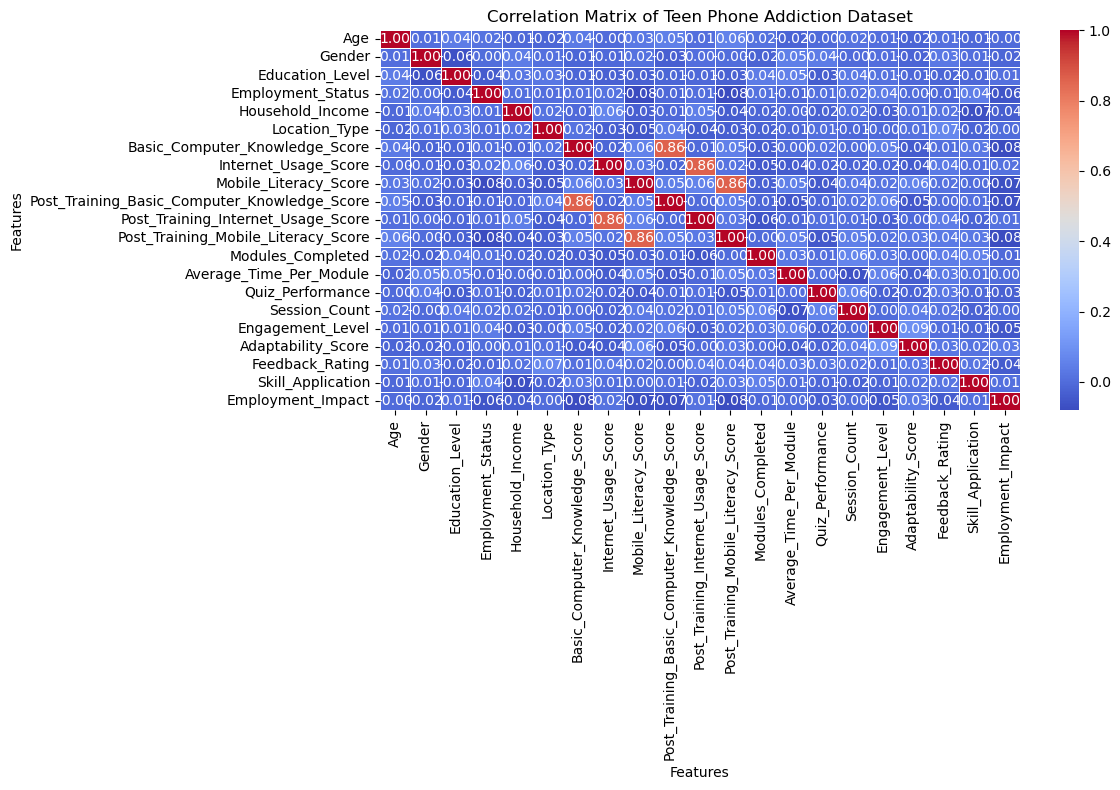

In [10]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| Education_Level | Nivo obrazovanja |
| Employment_status | Status zaposlenja |
| Household_Income  | Prihodi domacinstva |
| Location_Type  | Tip lokacije   |
| Basic_Computer_Knowledge_Score |  Osnovno znanje rada na racunaru |
| Internet_Usage_Score |  Rezultati koriscenja interneta   |
| Mobile_Literacy_Score | Rezultati koriscenja mobilnog  |
| Post_Training_Basic_Computer_Knowledge_Score | Znanje na racunaru posle obuke   |
| Post_Training_Internet_Usage_Score  | Znanje koriscenja interneta nakon obuke  |
| Post_Training_Mobile_Literacy_Score |  Znanje koriscenja mobilnog nakon obuke  |
| Modules_Completed  |  Zavrseni moduli   |
| Average_Time_Per_Module   | Prosecno vreme po modulu |
| Quiz_Performance  | Rezultati kviza   |
| Session_Count | Broj sesija |
| Engagement_Level  |   Nivo angazovanja  |
| Adaptability_Score | Rezultati prilagodljivosti   |
| Feedback_Rating   | Nivo povratne informacije|
| Skill_Application |  Primena vestina   |
| Employment_Impact |  Uticaj zaposljenja  |

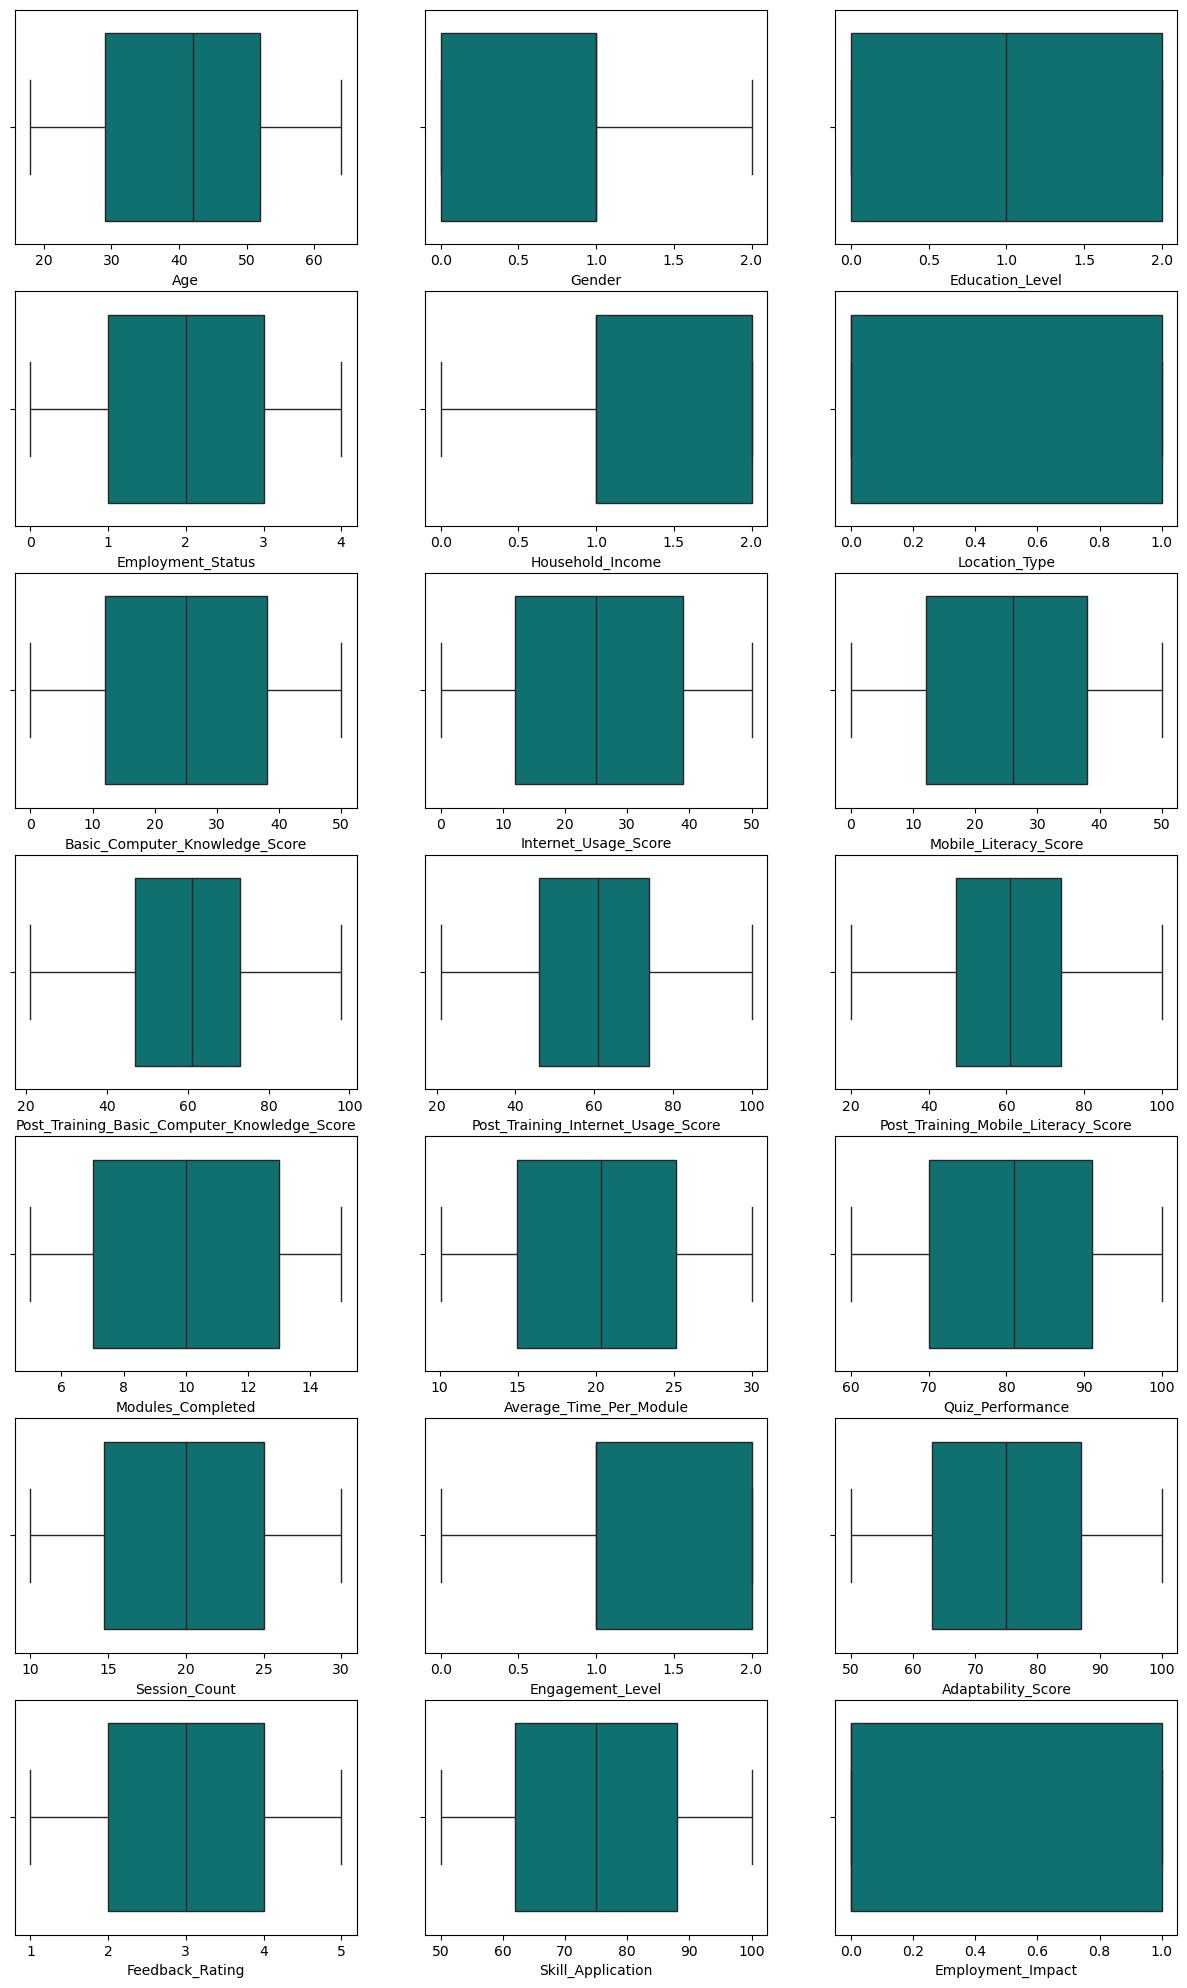

In [11]:
fig = plt.figure(figsize=(15,25))
for i, col in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

### MinMax or Standard Scaler

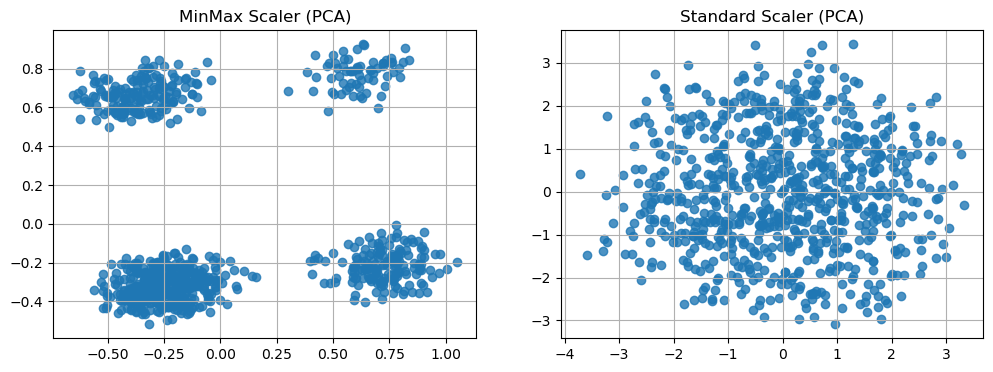

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df_minmax= minmax_scaler.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=df.columns)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_minmax = pca.fit_transform(df_minmax)

df_std= std_scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_std = pca.fit_transform(df_std)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result_minmax[:, 0], pca_result_minmax[:, 1], alpha=0.8)
plt.title(f"MinMax Scaler (PCA)")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(pca_result_std[:, 0], pca_result_std[:, 1], alpha=0.8)
plt.title(f"Standard Scaler (PCA)")
plt.grid()
plt.show()

df_scaled = df_minmax  # or df_std based on your choice


## K-Means

### PCA

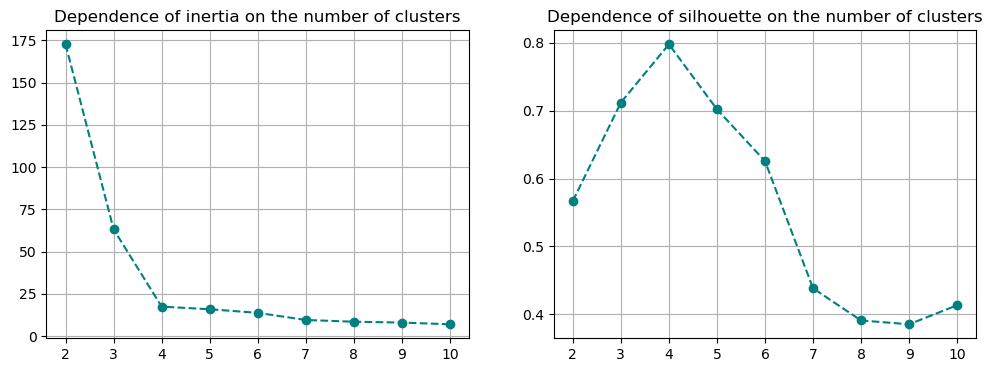

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scaler = MinMaxScaler()
cols = ['Cluster',"Cluster_Name"]
'''if all(col in df_scaled.columns for col in cols): 
    data=df_scaled.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df_scaled.copy()'''

data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()

pca = PCA(n_components=2) #Smanjenje dimenzionalnosti na 2 komponente
pca_result = pca.fit_transform(data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


Na osnovu grafika inercije i zavisnosti vrednosti siluete možemo zaključiti da je optimalan broj klastera 4. Na grafiku inercije se "lakat" uočava kod 4 klastera, osim toga maksimalna vrednost siluete potvrđuje klasterizacija u 4 klastera.

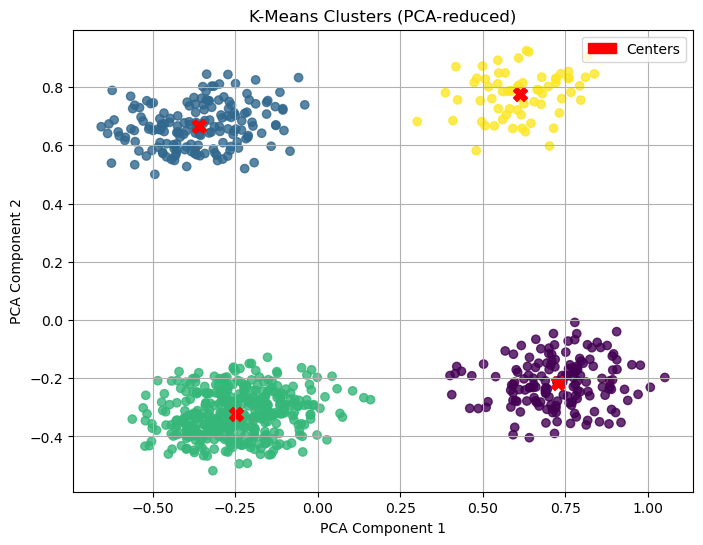

In [14]:
import matplotlib.patches as mpatches

kmeans = KMeans(n_clusters=4, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 1],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Parametri u skupu podataka koje su imale uticaj na klasifikaciju jesu 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score' i njene vrednosti nakon treniranja korisnika 'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score'.

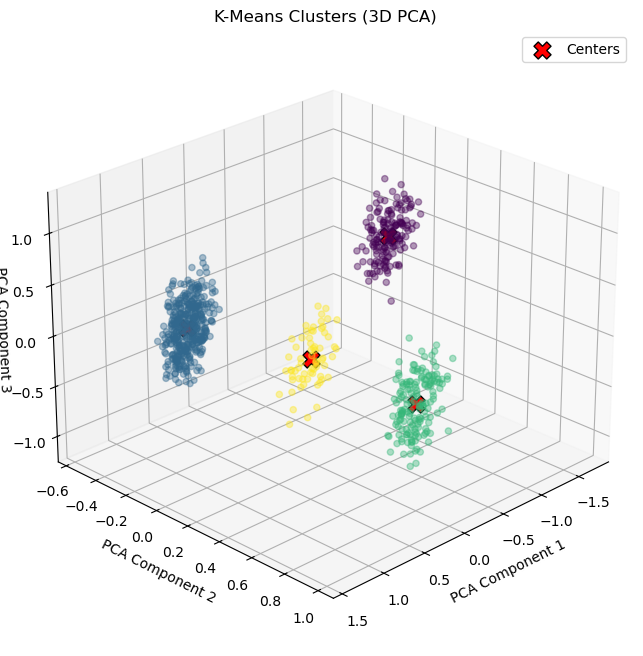

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cols = ['Cluster',"Cluster_Name"]
'''if all(col in df_scaled.columns for col in cols): 
    data=df_scaled.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df_scaled.copy()'''

data = df_scaled.drop(['Cluster', 'Cluster_Name'], axis=1) if all(col in df_scaled.columns for col in cols) else df_scaled.copy()


pca = PCA(n_components=3) #Smanjenje dimenzionalnosti na 2 komponente
pca_result_3d = pca.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=18)
df_scaled['Cluster'] = kmeans.fit_predict(pca_result_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_result_3d[:, 0], pca_result_3d[:, 1], pca_result_3d[:, 2],
    c=df_scaled['Cluster'], cmap='viridis', alpha=0.4,zorder=1, depthshade=True
)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],alpha=1,
           c='red', s=150, marker='X', label='Centers',edgecolor='black',zorder=1000,
            depthshade=False,linewidth=1)

ax.set_title("K-Means Clusters (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3",labelpad=0)
ax.view_init(elev=25, azim=45)
ax.legend()
plt.show()

### TSNE

C:\Users\marko\AppData\Local\Temp\ipykernel_8920\1422288019.py:21: RuntimeWarning: Mean of empty slice.
  centers_2d = np.vstack([X_embedded[labels == i].mean(axis=0) for i in range(k)])
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


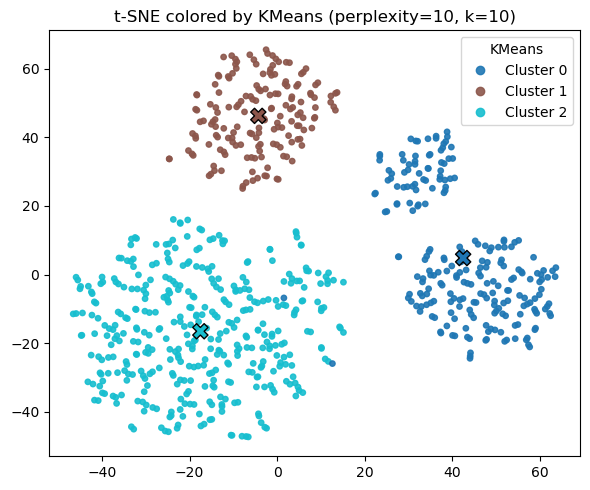

C:\Users\marko\AppData\Local\Temp\ipykernel_8920\1422288019.py:21: RuntimeWarning: Mean of empty slice.
  centers_2d = np.vstack([X_embedded[labels == i].mean(axis=0) for i in range(k)])
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


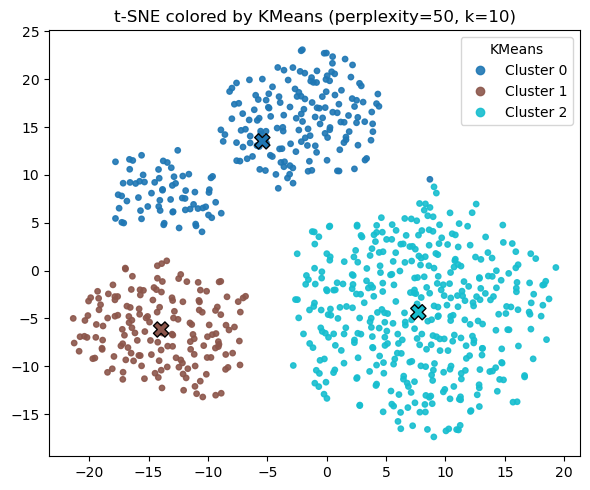

C:\Users\marko\AppData\Local\Temp\ipykernel_8920\1422288019.py:21: RuntimeWarning: Mean of empty slice.
  centers_2d = np.vstack([X_embedded[labels == i].mean(axis=0) for i in range(k)])
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


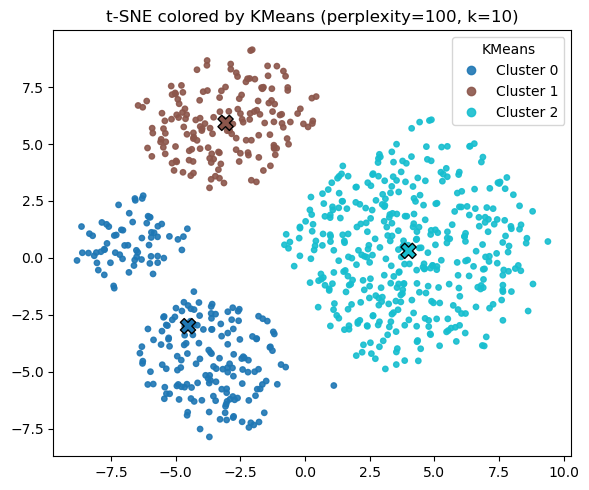

In [ ]:

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare your data (already scaled)
data = df_scaled.drop(['Cluster','Cluster_Name','Digital_Score'], axis=1, errors='ignore')

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
labels = kmeans.fit_predict(data)

# Step 3: t-SNE visualization colored by KMeans labels
for perp in [10, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=0)
    X_embedded = tsne.fit_transform(data.values)

    plt.figure(figsize=(6,5))
    sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='tab10', s=15, alpha=0.9)

    # Optional: show 2D centers (mean of embedded points per cluster)
    centers_2d = np.vstack([X_embedded[labels == i].mean(axis=0) for i in range(k)])
    plt.scatter(centers_2d[:,0], centers_2d[:,1], c=range(k), cmap='tab10', marker='X', s=120, edgecolor='k')

    plt.title(f"t-SNE colored by KMeans (perplexity={perp}, k={k})")
    handles, _ = sc.legend_elements()
    plt.legend(handles, [f"Cluster {i}" for i in range(k)], title="KMeans")
    plt.tight_layout()
    plt.show()



C:\Users\marko\AppData\Local\Temp\ipykernel_8920\2453917199.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], cmap='tab10', s=15, alpha=0.9)
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


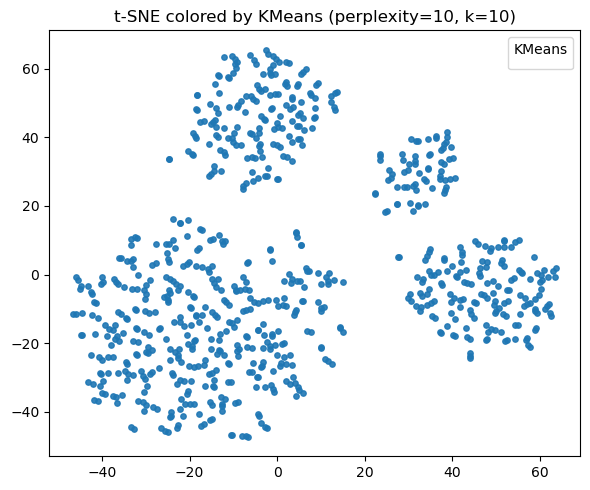

C:\Users\marko\AppData\Local\Temp\ipykernel_8920\2453917199.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], cmap='tab10', s=15, alpha=0.9)
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


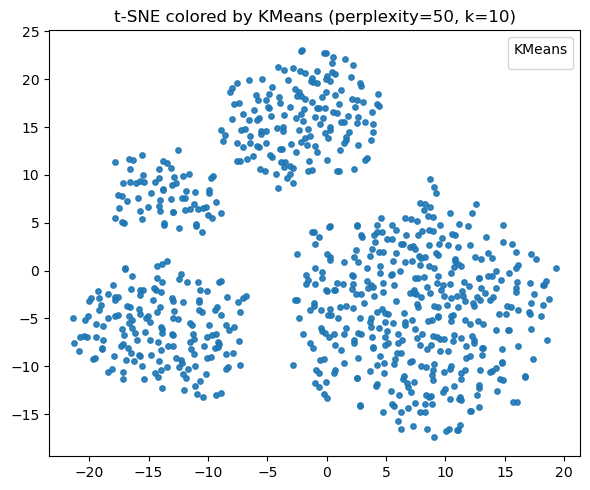

C:\Users\marko\AppData\Local\Temp\ipykernel_8920\2453917199.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], cmap='tab10', s=15, alpha=0.9)
c:\Users\marko\miniconda3\envs\ml\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


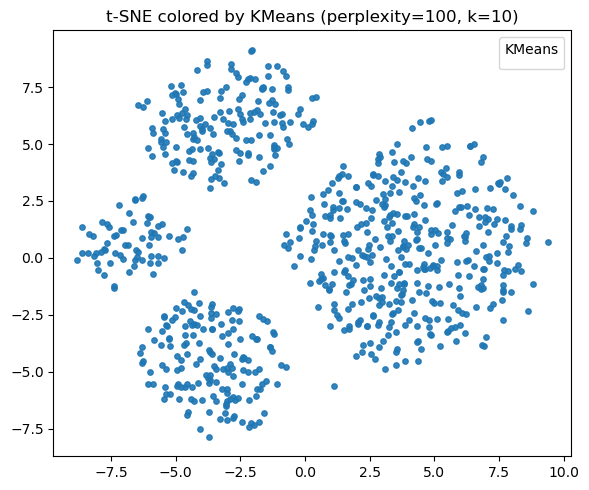

In [17]:

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare your data (already scaled)
data = df_scaled.drop(['Cluster','Cluster_Name','Digital_Score'], axis=1, errors='ignore')

# Step 3: t-SNE visualization colored by KMeans labels
for perp in [10, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=0)
    X_embedded = tsne.fit_transform(data.values)

    plt.figure(figsize=(6,5))
    sc = plt.scatter(X_embedded[:,0], X_embedded[:,1], cmap='tab10', s=15, alpha=0.9)

    # Optional: show 2D centers (mean of embedded points per cluster)

    plt.title(f"t-SNE colored by KMeans (perplexity={perp}, k={k})")
    handles, _ = sc.legend_elements()
    plt.legend(handles, [f"Cluster {i}" for i in range(k)], title="KMeans")
    plt.tight_layout()
    plt.show()



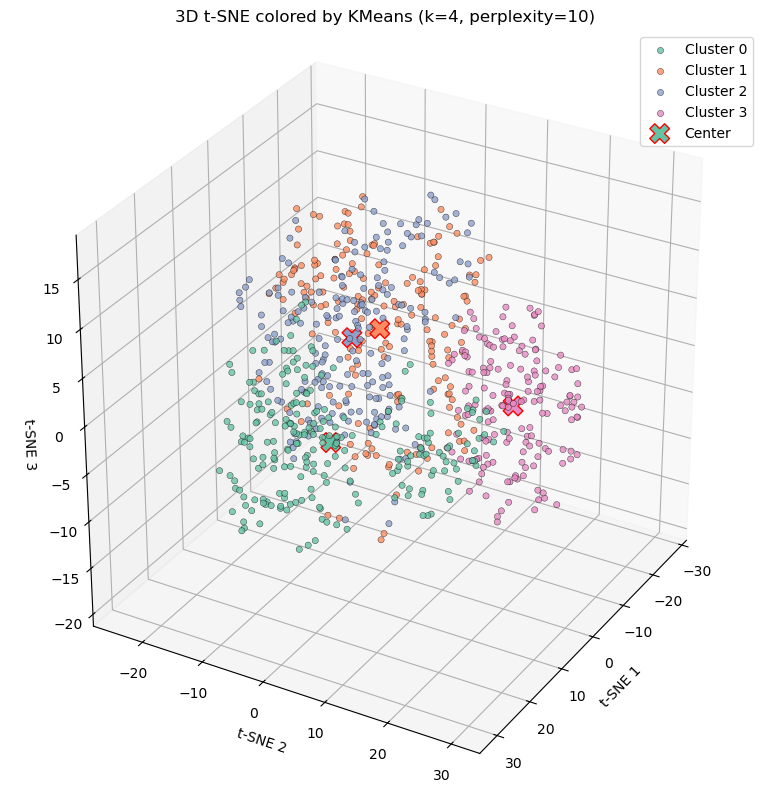

In [18]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare numeric data (already scaled)
X = df_scaled.drop(['Cluster', 'Cluster_Name', 'Digital_Score'], axis=1, errors='ignore').values
n_samples = X.shape[0]
k = 4

# KMeans on high-dimensional space (better practice)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# 3D t-SNE embedding
tsne = TSNE(n_components=3, perplexity=10, learning_rate='auto', init='pca', random_state=42)
emb = tsne.fit_transform(X)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

palette = sns.color_palette("Set2", n_colors=k)

for i in range(k):
    idx = labels == i
    ax.scatter(
        emb[idx, 0], emb[idx, 1], emb[idx, 2],
        c=[palette[i]], label=f'Cluster {i}', s=20, alpha=0.8,
        edgecolor='k', linewidth=0.3
    )

# Show "centers" as the mean of embedded points per cluster (t-SNE has no transform)
centers_3d = np.vstack([emb[labels == i].mean(axis=0) for i in range(k)])
ax.scatter(
    centers_3d[:, 0], centers_3d[:, 1], centers_3d[:, 2],
    c=[palette[i] for i in range(k)], marker='X', s=200,alpha=1,
    edgecolor='red', linewidth=1.0, label='Center', zorder=5
)

ax.set_title(f"3D t-SNE colored by KMeans (k={k}, perplexity={10})")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")
ax.view_init(elev=30, azim=30)
try:
    ax.set_box_aspect([1, 1, 1])  # safer across Matplotlib versions
except Exception:
    pass
ax.legend()
plt.tight_layout()
plt.show()


## DBSCAN


StandardScaler DBSCAN cluster counts:
-1     176
 0     511
 1       9
 2       5
 3      26
 4       7
 5      10
 6      11
 7       8
 8       9
 9       9
 10      7
Name: count, dtype: int64

MinMaxScaler DBSCAN cluster counts:
0     67
1    160
2    396
3    165
Name: count, dtype: int64


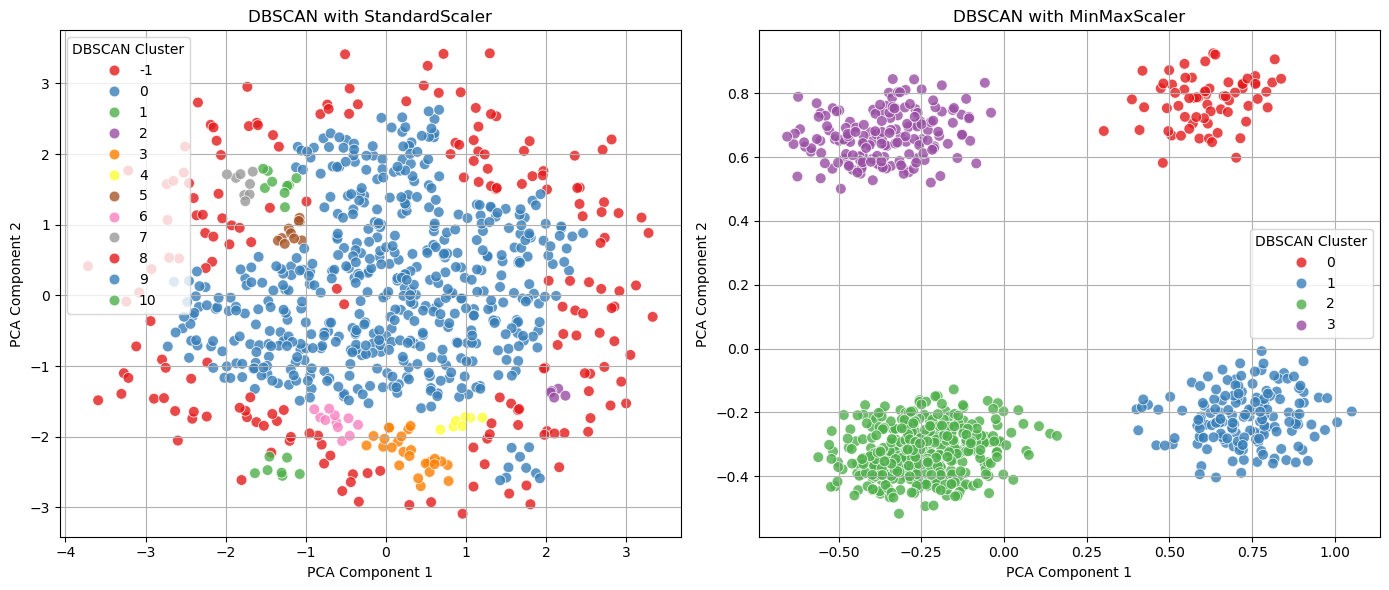

In [19]:
# Comparison between StandardScaler and MinMaxScaler for DBSCAN clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols = ['Cluster', 'Cluster_Name','Digital_Score']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    dbscan = DBSCAN(eps=0.23, min_samples=5)
    dbscan_labels = dbscan.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": dbscan_labels,
        "pca_result": pca_result
    }
    print(f"\n{scaler_name} DBSCAN cluster counts:")
    print(pd.Series(dbscan_labels).value_counts().sort_index())

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = sns.color_palette("Set1", n_colors=len(set(res["labels"])))
    sns.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        s=60,
        ax=ax
    )
    ax.set_title(f"DBSCAN with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="DBSCAN Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Hierarchical Agglomerative clustering

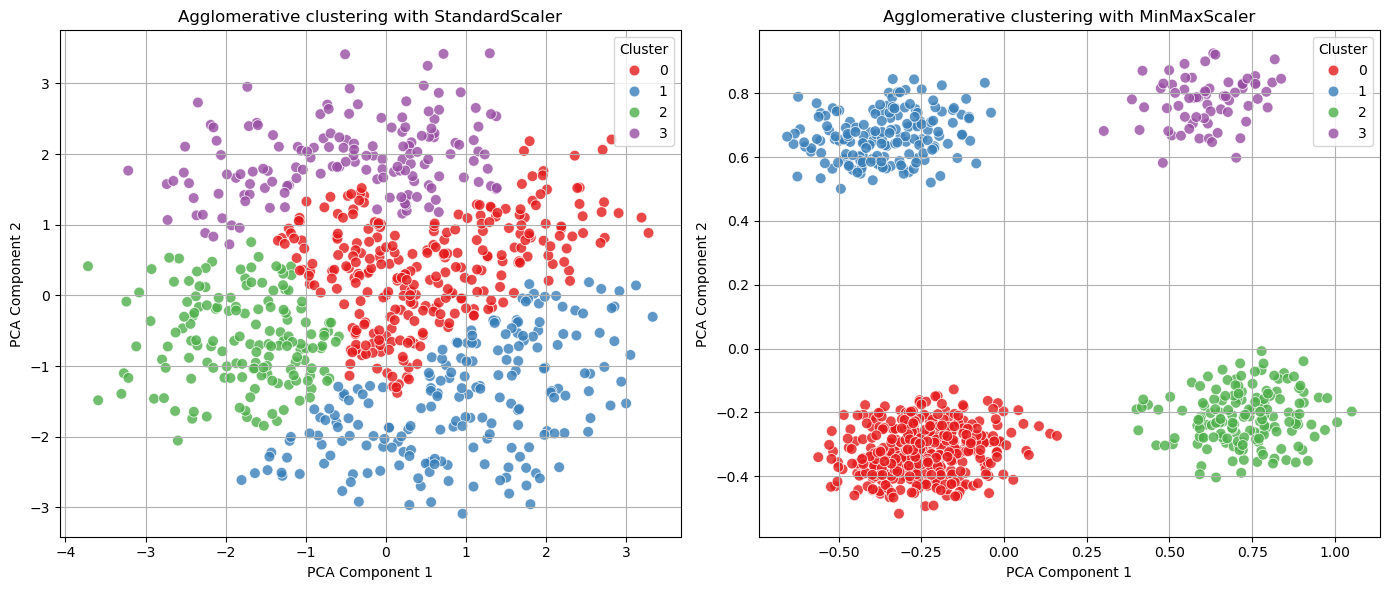

In [20]:
from sklearn.cluster import AgglomerativeClustering

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result)
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result,
        "scaled_data":scaled_data
    }

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, (scaler_name, res) in zip(axes, results.items()):
    palette = sns.color_palette("Set1", n_colors=len(set(res["labels"])))
    sns.scatterplot(
        x=res["pca_result"][:, 0], y=res["pca_result"][:, 1],
        hue=res["labels"],
        palette=palette,
        legend='full',
        alpha=0.8,
        s=60,
        ax=ax
    )
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.grid(True)

plt.tight_layout()
plt.show()


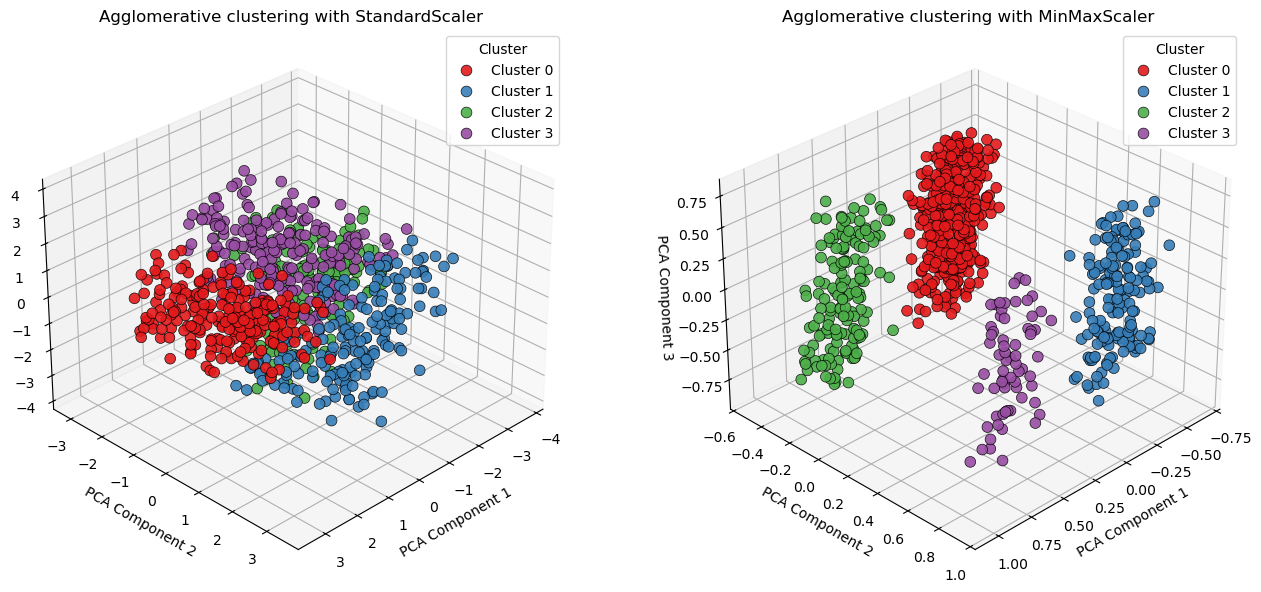

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}


for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result_3d = pca.fit_transform(scaled_data)
    
    aggclust = AgglomerativeClustering(n_clusters=4)
    aggclust_labels = aggclust.fit_predict(pca_result_3d)
    
    results[scaler_name] = {
        "labels": aggclust_labels,
        "pca_result": pca_result_3d,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            res["pca_result"][idx, 2],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Agglomerative clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    ax.view_init(elev=30, azim=45)
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


Threshold for 4 clusters: 8.188648576170745


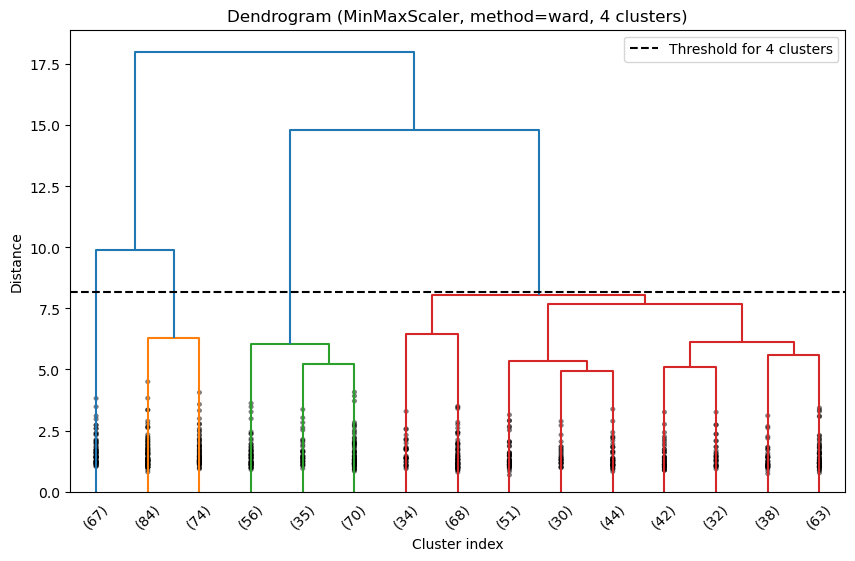

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(results[scaler_name]["scaled_data"], method="ward")

# Determine the threshold that gives 4 clusters
max_d = 0.0
for t in np.linspace(0, np.max(Z[:, 2]), 100):
    if len(np.unique(fcluster(Z, t, criterion='distance'))) == 4:
        max_d = t
        break

print(f"Threshold for 4 clusters: {max_d}")

# Plot dendrogram with color threshold
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=15,
    leaf_rotation=45.,
    leaf_font_size=10.,
    show_contracted=True,
    color_threshold=max_d
)
plt.title(f"Dendrogram ({scaler_name}, method=ward, 4 clusters)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.axhline(y=max_d, c='k', ls='--', label=f'Threshold for 4 clusters')
plt.legend()
plt.show()

## Mean Shift Clustering

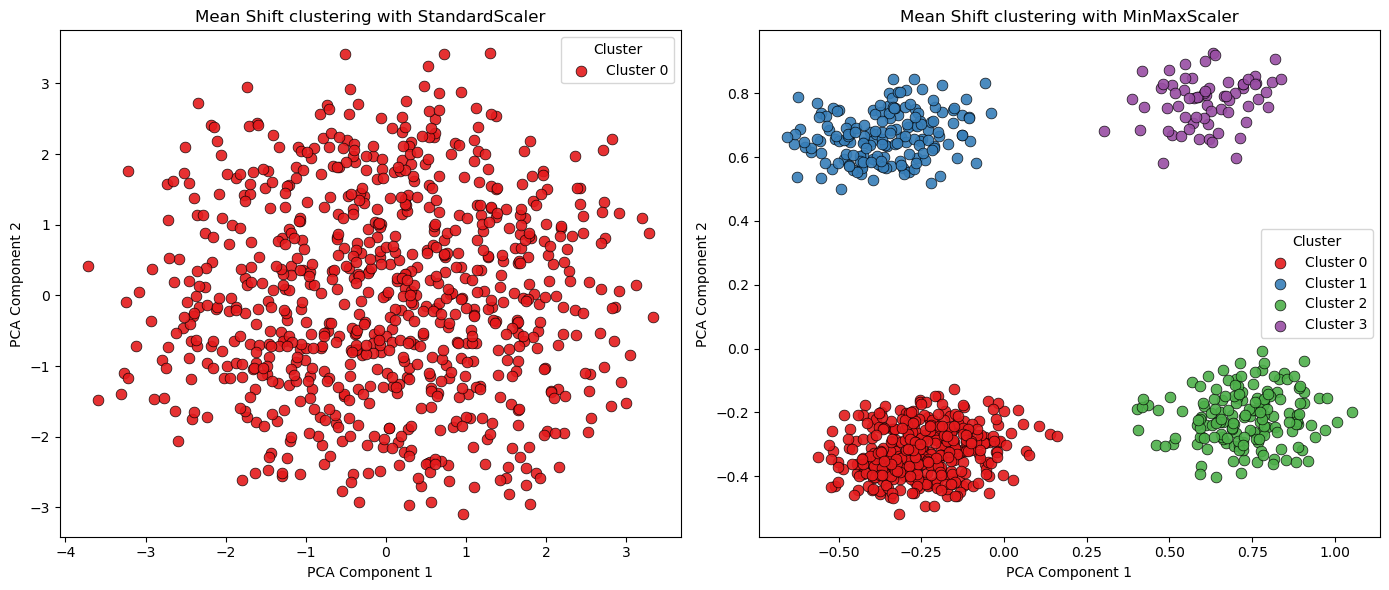

In [23]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=2)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    mean_shift = MeanShift()
    labels = mean_shift.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1)
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Mean Shift clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")

plt.tight_layout()
plt.show()


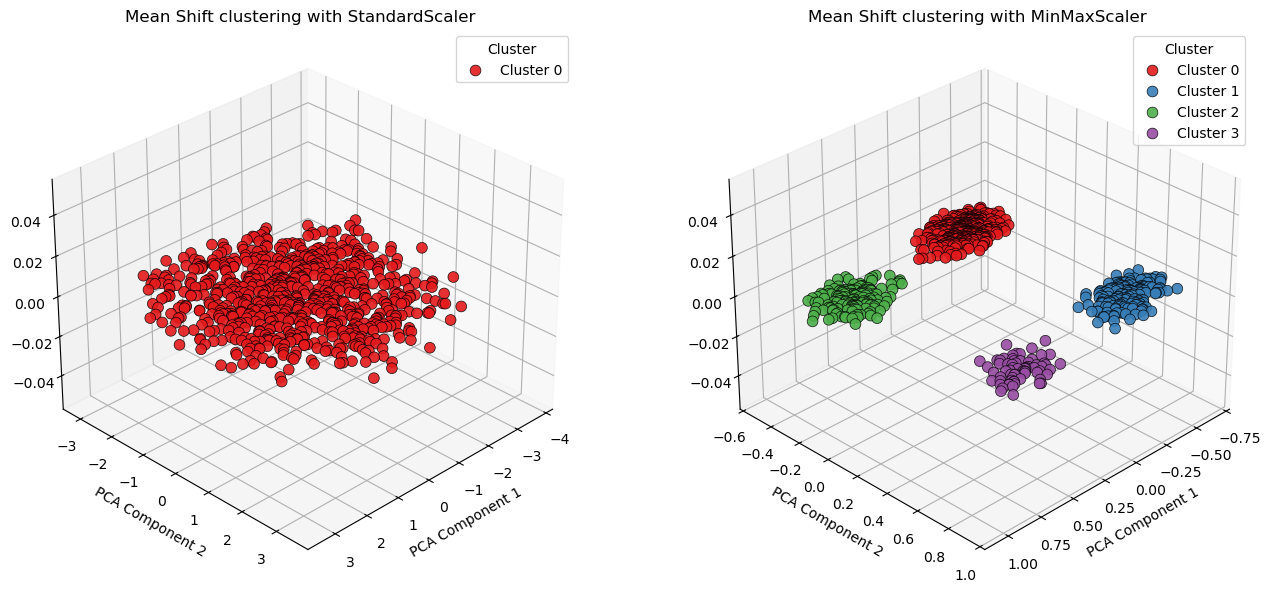

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    bandwidth = estimate_bandwidth(pca_result, quantile=0.2) 
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Mean Shift clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


## BIRCH

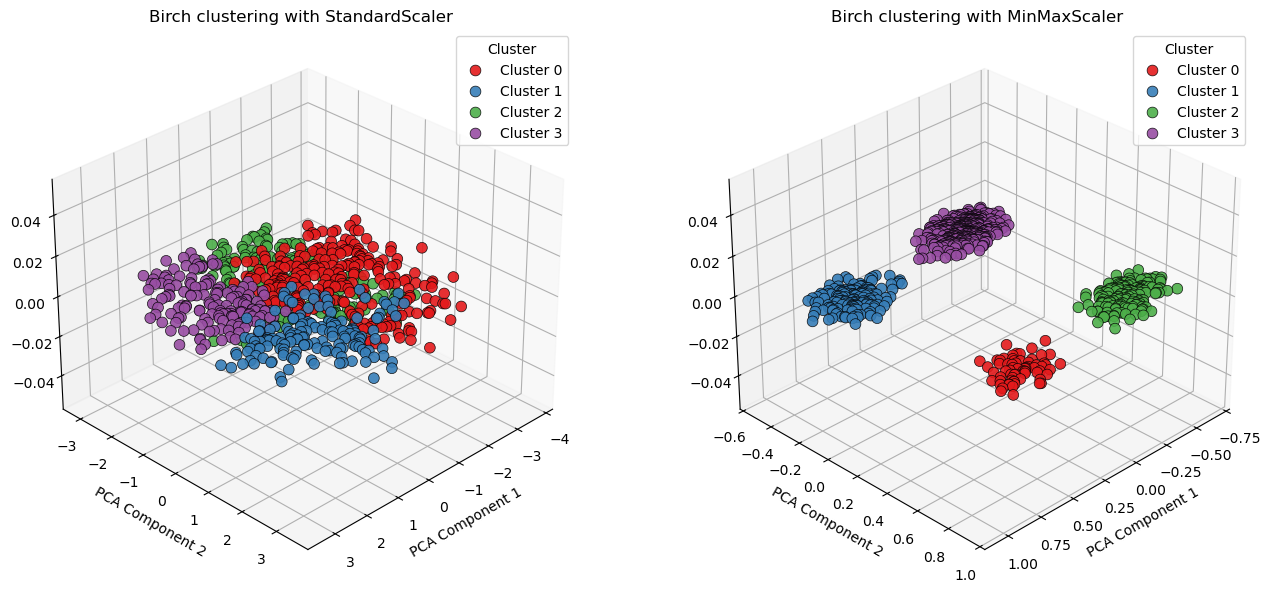

In [25]:
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cols = ['Cluster', 'Cluster_Name']
data = df.drop(cols, axis=1) if all(col in df.columns for col in cols) else df.copy()

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

results = {}

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(data)
    pca = PCA(n_components=3)  # 3D PCA
    pca_result = pca.fit_transform(scaled_data)
    
    birch_model = Birch(threshold=0.3, n_clusters=4)  
    labels = birch_model.fit_predict(pca_result)
    
    results[scaler_name] = {
        "labels": labels,
        "pca_result": pca_result,
        "scaled_data": scaled_data
    }


fig = plt.figure(figsize=(14, 6))

for i, (scaler_name, res) in enumerate(results.items()):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    
    unique_labels = sorted(set(res["labels"]))
    palette = sns.color_palette("Set1", n_colors=len(unique_labels))
    
    for lbl, color in zip(unique_labels, palette):
        idx = res["labels"] == lbl
        ax.scatter(
            res["pca_result"][idx, 0],
            res["pca_result"][idx, 1],
            c=[color],
            label=f'Cluster {lbl}',
            s=60,          # ista veličina kao u PCA/t-SNE
            alpha=0.9,
            edgecolor='k',
            linewidth=0.5
        )
    
    ax.set_title(f"Birch clustering with {scaler_name}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster")
    ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()



## Analiza klasterizacije

In [26]:
df_scaled['Digital_Score'] = (
    df_scaled['Internet_Usage_Score'] +
    df_scaled['Mobile_Literacy_Score'] +
    df_scaled['Basic_Computer_Knowledge_Score']
)

cluster_profile = df_scaled.groupby('Cluster')[
    [
        "Cluster",
        'Digital_Score',
        'Internet_Usage_Score',
        'Mobile_Literacy_Score',
        'Basic_Computer_Knowledge_Score'        
    ]
].mean().round(2).sort_values(by='Digital_Score', ascending=False)

showReports(
    dfs=[cluster_profile],
    titles=["Cluster Profile"] 
)

df_scaled.drop(columns=['Digital_Score'], inplace=True)

Cluster Profile 
 
 
 Cluster 
 Digital_Score 
 Internet_Usage_Score 
 Mobile_Literacy_Score 
 Basic_Computer_Knowledge_Score 
 
 
 
 
 1.0 
 1.55 
 0.50 
 0.53 
 0.51 
 
 
 2.0 
 1.51 
 0.48 
 0.50 
 0.53 
 
 
 0.0 
 1.47 
 0.51 
 0.49 
 0.46 
 
 
 3.0 
 1.41 
 0.50 
 0.45 
 0.46

In [27]:
cluster_names = {
    3: "Basic",
    0: "Intermediate",
    2: "Advanced",
    1: "Expert",
}
df_scaled['Cluster_Name'] = df_scaled['Cluster'].map(cluster_names)

mapping_df = pd.DataFrame(
    list(cluster_names.items()),
    columns=["Cluster Number", "Cluster Name"]
)

showReports(
    dfs=[mapping_df],
    titles=["Cluster Mapping"]
)

Cluster Mapping 
 
 
 Cluster Number 
 Cluster Name 
 
 
 
 
 3 
 Basic 
 
 
 0 
 Intermediate 
 
 
 2 
 Advanced 
 
 
 1 
 Expert

In [28]:
df_original = df.copy()

df_original = df_original.reset_index(drop=True)
df_scaled_reset = df_scaled.reset_index(drop=True)

categorical_cols = ["Gender", "Education_Level", "Employment_Status","Household_Income","Location_Type","Engagement_Level","Employment_Impact"]
'''df_original.head()
for col in categorical_cols:
    df_original[col] = label_encoders[col].inverse_transform(df_original[col])
'''
df_original['Cluster_Name'] = df_scaled_reset['Cluster_Name']

In [29]:
def plot_3d_features(feature1:str,feature2:str,feature3:str,cat_features:list):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    clusters = df_original['Cluster_Name'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))

    for cluster, color in zip(clusters, colors):
        cluster_data = df_original[df_original['Cluster_Name'] == cluster]
        ax.scatter(
        cluster_data[feature1],
        cluster_data[feature2],
        cluster_data[feature3],
        label=f"{cluster}",
        alpha=0.7,
        s=30)

    ax.set_title(f"3D Scatter Plot: {feature1}, {feature2}, {feature3}")
    ax.set_xlabel(feature1, fontsize=9)
    ax.set_ylabel(feature2, fontsize=9)
    ax.set_zlabel(feature3, fontsize=9)

    if(feature1 in cat_features):
        ax.set_xticks(list(label_encoders[feature1].transform(label_encoders[feature1].classes_)))
        ax.set_xticklabels(label_encoders[feature1].classes_, fontsize=8)

    if(feature2 in cat_features):
        ax.set_yticks(list(label_encoders[feature2].transform(label_encoders[feature2].classes_)))
        ax.set_yticklabels(label_encoders[feature2].classes_, fontsize=8)
    if(feature3 in cat_features):
        ax.set_zticks(list(label_encoders[feature3].transform(label_encoders[feature3].classes_)))
        ax.set_zticklabels(label_encoders[feature3].classes_, fontsize=8)
        
    ax.legend(loc="best")
    ax.set_box_aspect(None, zoom=0.85)
    plt.show()


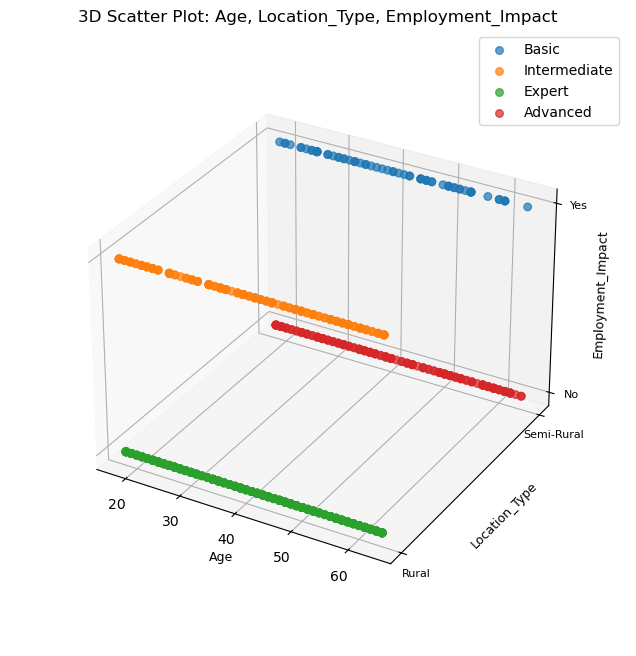

In [30]:
plot_3d_features('Age','Location_Type',"Employment_Impact",cat_features=['Location_Type',"Employment_Impact"])

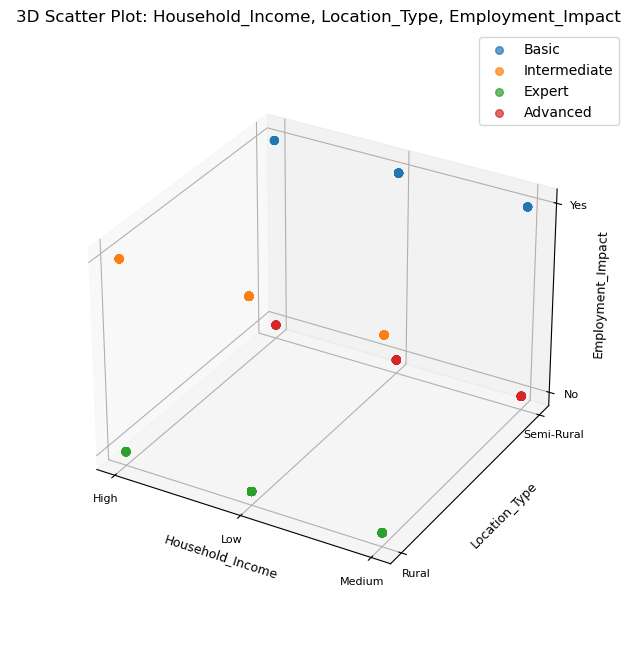

In [31]:
plot_3d_features('Household_Income','Location_Type',"Employment_Impact",cat_features=['Household_Income','Location_Type',"Employment_Impact"])

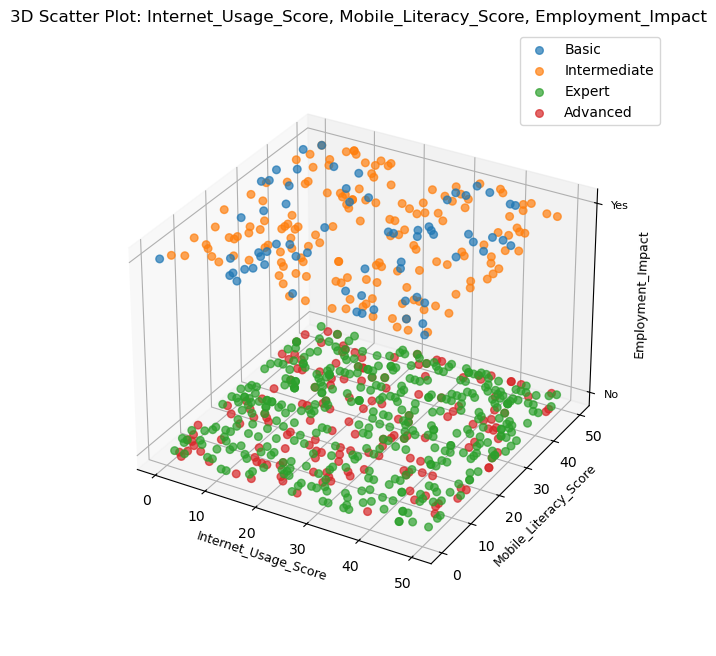

In [41]:
plot_3d_features('Internet_Usage_Score','Mobile_Literacy_Score',"Employment_Impact",cat_features=['Location_Type',"Employment_Impact"])

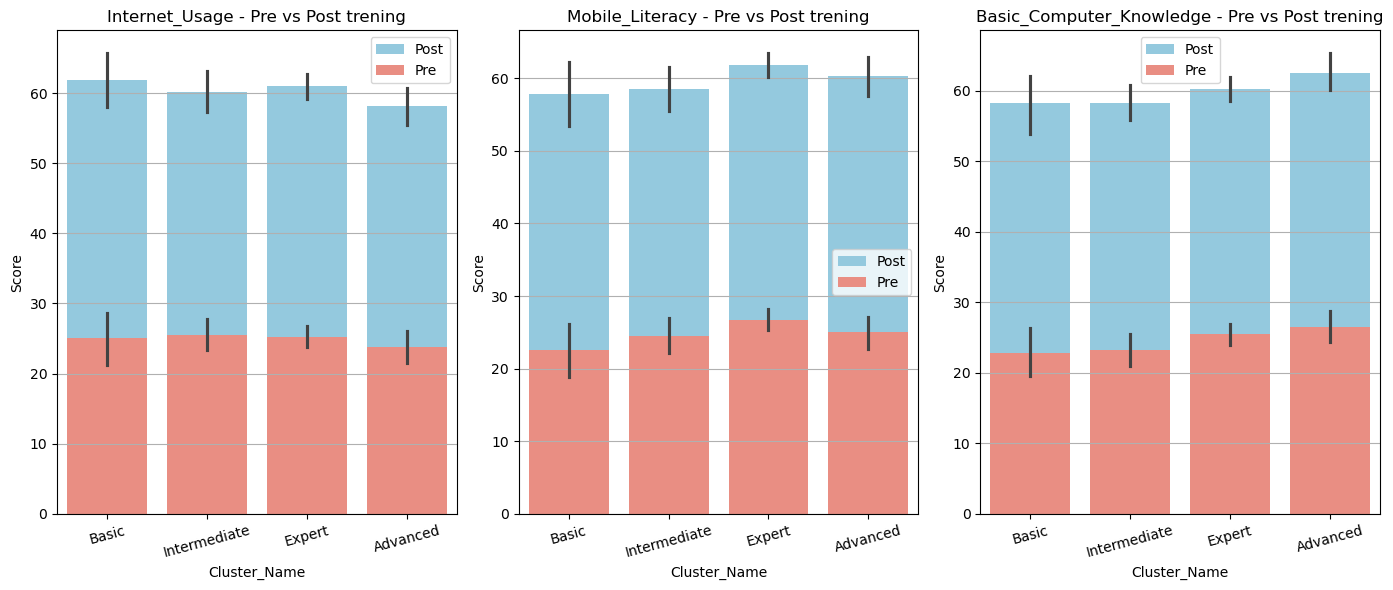

In [ ]:
order = ["Basic", "Intermediate", "Expert", "Advanced"]
atributtes = ['Internet_Usage', 'Mobile_Literacy', 'Basic_Computer_Knowledge']

plt.figure(figsize=(14, 6))
for i, attr in enumerate(atributtes):
    plt.subplot(1, 3, i+1)
    seaborn.barplot(
        x='Cluster_Name', 
        y=f'Post_Training_{attr}_Score', 
        data=df_original, 
        color='skyblue', 
        label='Post',
        order=order
    )
    seaborn.barplot(
        x='Cluster_Name', 
        y=f'{attr}_Score', 
        data=df_original, 
        color='salmon',
        label='Pre',
        order=order
    )
    plt.title(f'{attr} - Pre vs Post trening')
    plt.ylabel('Score')
    plt.xticks(rotation=15)  
    plt.legend(loc='best')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()